<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793672/blob/main/DataAnalysisPythonIBM_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA ANALYSIS WITH PYTHON (IBM)**
---
#**Modulo 4 - Desarrollo del Modelo**
---
##**Alumno: Freddy Armendariz Herrera**
##**Matrícula: A01793672**
---

---
##**Desarrollo del Modelo**

Se examinara el desarrollo del modelo tratando de predecir el precio del auto.

**Objetivos de Aprendizaje**

1. Regresion Lineal Simple y Multiple
2. Evaluacion del Modelo utilizando Visualizacion
3. Regresion Polinomial y Pipelines
4. R-squared y MSE para Evaluacion In-Sample
5. Prediccion y Tomador de Decisiones

**Pregunta**

¿Como se puede determinar un valor razonable para un auto usado?

Un modelo puede representarse como una ecuacion matematica usada para predecir diferentes valores dados.

Relacionando una o mas variables independientes con variables dependientes.

Mientras mas relevantes sean los datos, mas preciso sera el modelo.

In [38]:
#Se importan librerías y se carga el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url, header = None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers #Reemplaza el encabezado por defecto.

df.replace('?',np.NaN,inplace=True) #Reemplaza los ? por NaN

df.dropna(              #Selecciona filas o columnas con valores faltantes para eliminarlos.
    subset=["price"],   #Columna donde se verifican datos faltantes.
    axis=0,             #0 para registros y 1 para columnas.
    inplace=True        #La modificación se realiza directamente en el dataset.
)


df["highway-mpg"]=df["highway-mpg"].astype(float) #Cambia el tipo de dato de la columna seleccionada
mean=df["highway-mpg"].mean() #Calcula el promedio de la columna

df["highway-mpg"].replace(  #Seleeciona la columna normalized-losses para reemplazar datos
    np.nan,                       #Un valor NaN
    mean,                         #Por el promedio de dicha columna
    inplace=True                  #Directamente sobre el dataset
)

df["horsepower"]=df["horsepower"].astype(float) #Cambia el tipo de dato de la columna seleccionada
mean=df["horsepower"].mean() #Calcula el promedio de la columna

df["horsepower"].replace(  #Seleeciona la columna normalized-losses para reemplazar datos
    np.nan,                       #Un valor NaN
    mean,                         #Por el promedio de dicha columna
    inplace=True                  #Directamente sobre el dataset
)

df["curb-weight"]=df["curb-weight"].astype(float) #Cambia el tipo de dato de la columna seleccionada
mean=df["curb-weight"].mean() #Calcula el promedio de la columna

df["curb-weight"].replace(  #Seleeciona la columna normalized-losses para reemplazar datos
    np.nan,                       #Un valor NaN
    mean,                         #Por el promedio de dicha columna
    inplace=True                  #Directamente sobre el dataset
)

df["engine-size"]=df["engine-size"].astype(float) #Cambia el tipo de dato de la columna seleccionada
mean=df["engine-size"].mean() #Calcula el promedio de la columna

df["engine-size"].replace(  #Seleeciona la columna normalized-losses para reemplazar datos
    np.nan,                       #Un valor NaN
    mean,                         #Por el promedio de dicha columna
    inplace=True                  #Directamente sobre el dataset
)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450


---
##**Regresion Lineal Simple y Multiple**

Una regresion lineal se refiere a una variable independiente realizando una prediccion.

Una regresion lineal multiple se refiere a multiples variables independientes realizando una prediccion.

**Regresion Lineal Simple (SLR)**

Es un metodo que nos ayuda a comprender la relacion entre dos variables:
* Predictor (variable independiente) X.
* Target (variable dependiente) Y.

Cuando se entrena un modelo, realmente se estan buscando los coeficientes y constantes en la ecuacion.

El modelo se entrana con datos y despues es utilizado para predecir otros datos.

No hay que olvidar que el modelo no es siempre correcto.

Existen errores o ruido que no respeta la regresion lineal.

In [39]:
# Importar modelo de regresion lineal de scikit-learn
from sklearn.linear_model import LinearRegression

In [40]:
# Creacion de objeto de Regresion Lineal
lm = LinearRegression()

In [41]:
# Se definen las variables de predictor y target
X = df[["highway-mpg"]]
Y = df["price"]

In [42]:
# Se usa el objeto para entrenar el modelo
lm.fit(X,Y)

LinearRegression()

In [43]:
# Se puede obtener una prediccion ahora
Yhat = lm.predict(X)
Yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [44]:
#Ver el valor de b0 o intercept
lm.intercept_

38423.3058581574

In [45]:
#Corroborar el valor del coeficiente o b1
lm.coef_

array([-821.73337832])

La relacion entre el Price y el Highway es dada por:

Price = 38423.3058 - 821.73 * highway-mph

**Regresion Lineal Multiple (MLR)**

Este metodo es utilizado para explicar la relacion entre:

* Una variable target Y continua.
* Dos o mas predictores X.

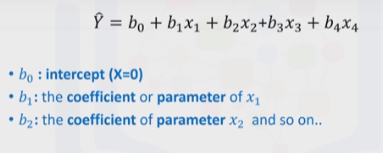

In [46]:
# Extraemos cuatro variables predictoras para guardarlas en la variable Z
Z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]

In [47]:
# Procedemos a entrenar el modelo
lm.fit(Z,X)

LinearRegression()

In [49]:
# Obtener las predicciones
Yhat = lm.predict(Z)

In [50]:
lm.intercept_

array([5.32907052e-14])

In [51]:
lm.coef_

array([[-3.79838048e-15, -1.26634814e-16,  5.00446039e-15,
         1.00000000e+00]])

---
##**Evaluacion del Modelo utilizando Visualizacion**

**Diagrama de Regresion**

Este diagrama nos da un buen estimado para:

1. La relacion entre dos variables
2. La fuerza de correlacion
3. La direccion de la relacion (positiva o negativa)

In [59]:
import seaborn as sns

X = df[["highway-mpg"]]
Y = df["price"]

#sns.regplot(X,Y)

**Diagrama de residuos**

In [57]:
#sns.residplot(X,Y)

---
##**Regresion Polinomial y Pipelines**

**Regresion Polinomial**

Es un caso especial del modelo de regresion lineal general.

Usado para descibir una relacion curvilineal.

In [61]:
#f = np.polyfit(x,y,3)
#p = np.polyld(f)
#print(p)

**Pipeline**

Un pipeline realiza secuencialmente una serie de transformaciones a los datos.

---
##**Mediciones para evaluar In-Sample**

Es una manera para determinar cuan bueno es un modelo entrenado de un dataset.

Hay dos importantes mediciones para determinar el entrenamiento de un mdoelo:

* Mean Squared Error (MSE)
* R-squared (R2)

In [62]:
from sklearn.metrics import mean_squared_error

#mean_squared_error(df["price"],Y_predict_simple_fit)

**R-squared**

Se refiere al Coeficiente de Determinacion o R squared.

Es una medicion para determinar cuan cerca se encuentran los datos con respecto a la linea de regresion entrenada.

Es el porcentaje de variacion de la variable target que es explicada por el modelo lineal.

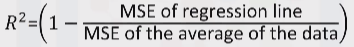

---
##**Prediccion y Toma de Decisiones**

Para esto se evaluan todos los modelos que se planean utilizar tomando en cuenta las metricas de desempeño y analizando cada uno de los graficos que estas mismas generan.

---
##**Lab4**

**Pregunta 1a**

Crea una regresion lineal llamada lm1

In [65]:
lm1 = LinearRegression()
lm1

LinearRegression()

**Pregunta 1b**

Entrena el modelo utulizando engine-size como la variable independiente y price como la variable dependiente.

In [66]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

**Pregunta 1 c**

Encuentra el slope y el intercept del modelo.

In [67]:
lm1.coef_

array([[166.86001569]])

In [68]:
lm1.intercept_

array([-7963.33890628])

---
##**Graded Review Questions**

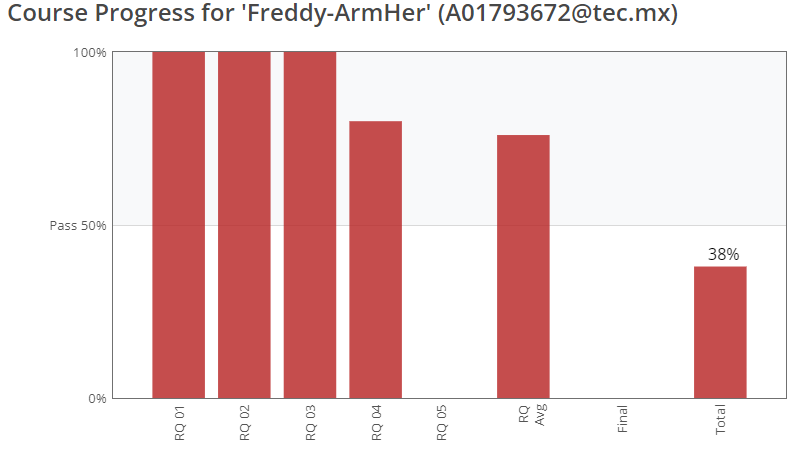